In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Magnetic field influence on the spectral line shapes and the polarization 

This notebook is similar (and thus, more streamlined) to the one you dealt with when studying velocity influences on the spectral line shape. Except in this one we will change the magnetic field and see how it influences the spectral line shape as well as the polarization.

We will proceed similarly to what we did yesterday: load a default model atmosphere, and then modify magnetic field, and write back, should be straightforward. 

#### Warning: Magnetic field is NOT a part of the atmospheric file itself, instead it is stored in a separate file. However from the notebook they are both read and "merged" into the same model. 

In [15]:
## We start with our familiar commands to be able to use RH tools:

import sys
sys.path.append('/home/milic/codes/RH/python/')

import matplotlib.pyplot as plt
from rhanalyze.rhatmos import input_atmos

In [16]:
# We are going to load the falc atmosphere in an object:
# ONE_D_PLANE is the "reserved" type for the atmosphere
# Keep in mind now we also have the magnetic field:

a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')

In [17]:
# Now let's look for the magnetic field:
a.B.shape

(82,)

In [18]:
# 82 points, just as we expected! There are also gamma and chi
# these are the inclination and the azimuth of the magnetic field:

In [19]:
print (a.B)

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]


#### Note that magnetic field is in Tesla, 1 Tesla = 10 000 Gauss . So this is fine, it's unform 500 Gauss magnetic field.
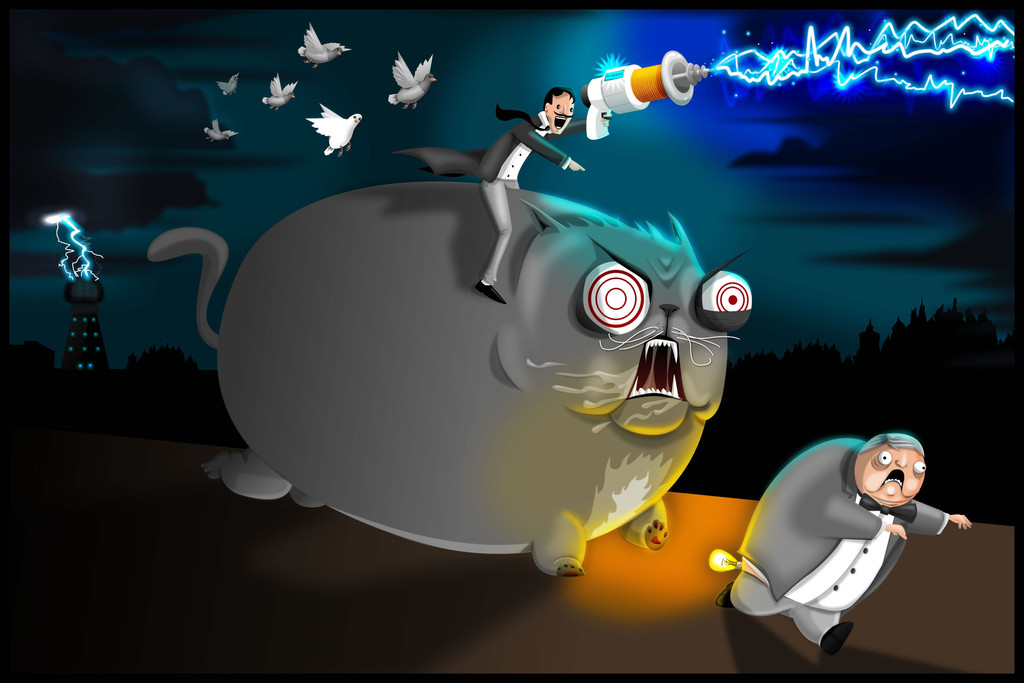

In [20]:
# Let's look at inclination and azimuth:

print (a.gamma)

print (a.chi)

[0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819 0.78539819
 0.78539819 0.78539819 0.78539819 0.78539819]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 

Looks like units for these are steradians, which makes sense. Let's save the file again! 

In [21]:
# Let's pretend we did something to the atmosphere and save it!
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess

## Modifying input files for RH - remember to change the mag field

#### Similarly to the previous situation, we have to tell RH to read this magnetic field file.


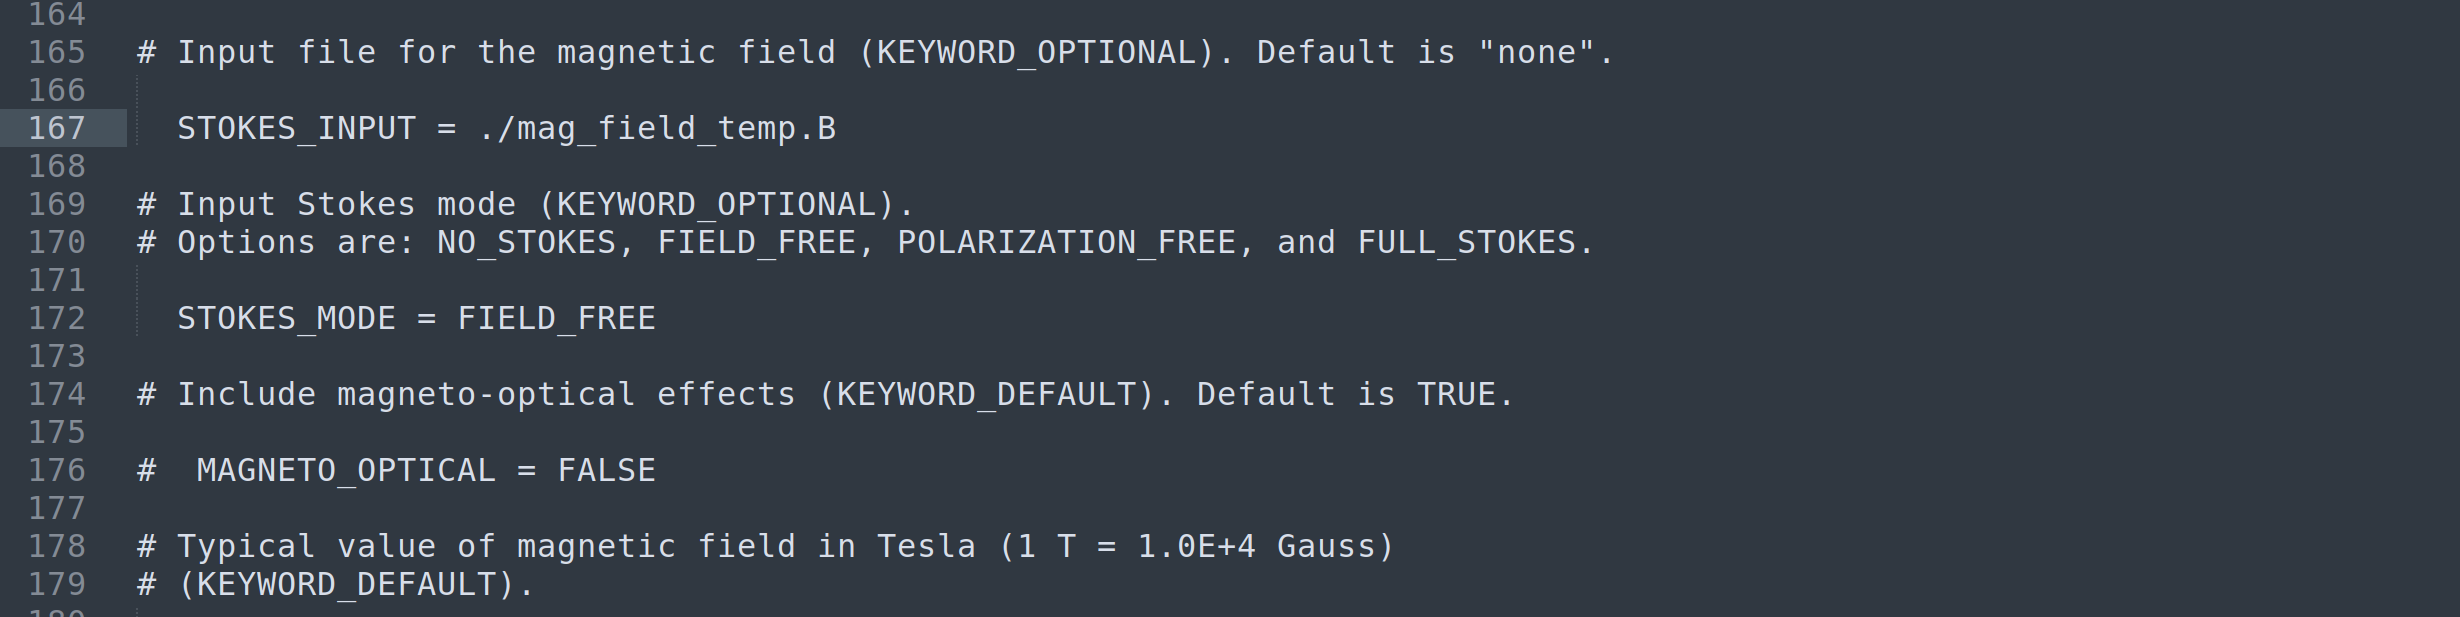

### Now jump to the terminal real quick and run ../rhf1d and ../solveray
.
.
.
.
.

### And now load the spectra and plot it! Basically all the same as we did before, except now we have to take into account all the Stokes parameters

In [22]:
# We are importing this again, just to be sure
import sys
sys.path.append('/home/milic/codes/RH/python/')

import numpy as np
import rhanalyze
from rhanalyze.rhatmos import input_atmos
import matplotlib.pyplot as plt


In [23]:
rhoutput ='/home/milic/codes/RH/rhf1d/run'

In [24]:
falc = rhanalyze.rhout(rhoutput) 
waves0=np.copy(falc.spectrum.waves)
# We will have to save wavelength grids each time as they are slightly different each time

In [25]:
# Now let'slook at the lines.
# Let's start with the most useful line of all, CaII 854.2 nm

I0=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q0=np.copy(falc.rays[0].Q) 
U0=np.copy(falc.rays[0].U) 
V0=np.copy(falc.rays[0].V) 


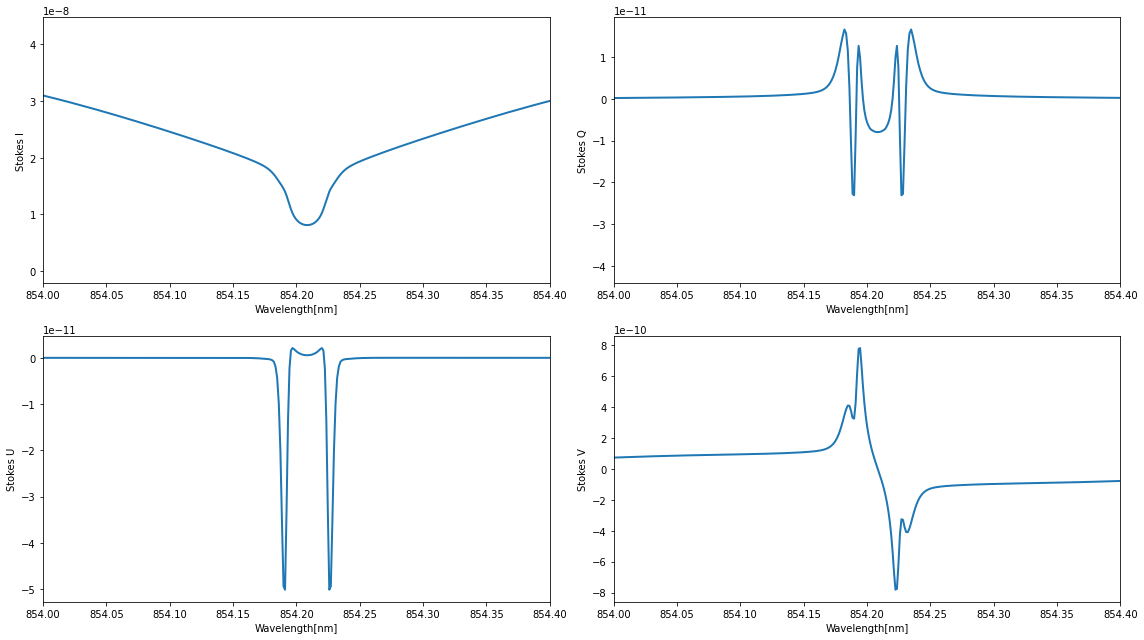

In [28]:
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves0,I0,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves0,Q0,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves0,U0,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves0,V0,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])

plt.tight_layout()

#### Looks good! It's common to divide with something like a continuum value to see the degree of polarization. Let's divide with $4 \times 10^{-8} $

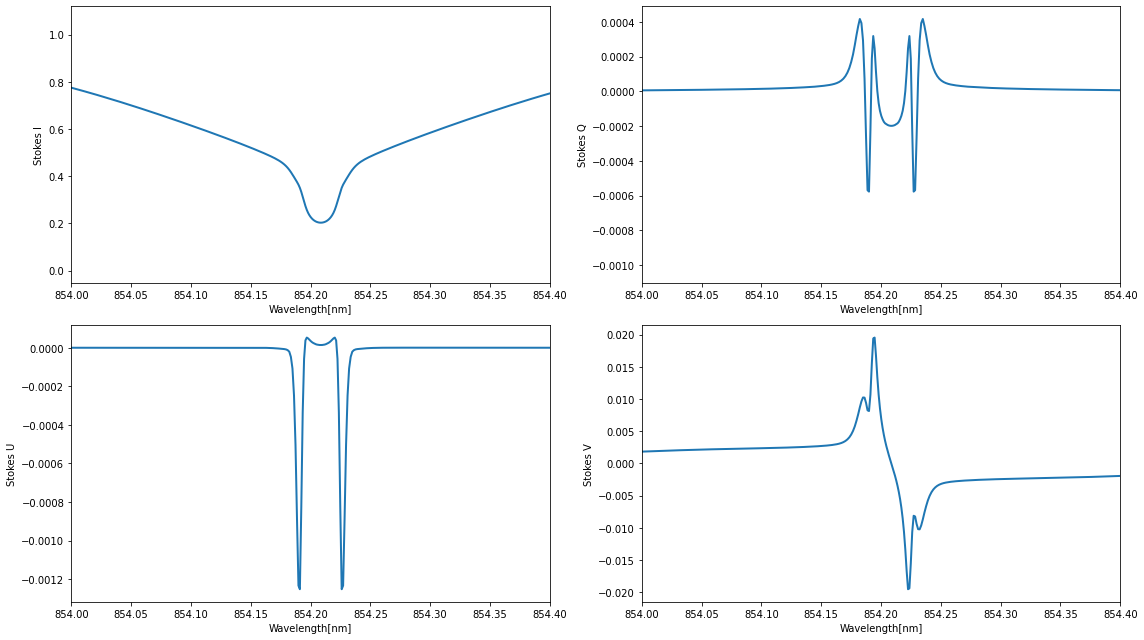

In [29]:
norm = 4E-8
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves0,I0/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves0,Q0/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves0,U0/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves0,V0/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])

plt.tight_layout()

### How big is this degree of polarization? Do you have a feeling how easy/hard is to measure this? 

#### To compare, let's calculate two more, one with 0 Gauss and one with, say, 2000 Gauss. 

In [32]:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')
a.B[:] = 0.0
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess


Execute again...

In [33]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves1=falc.spectrum.waves
I1=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q1=np.copy(falc.rays[0].Q) 
U1=np.copy(falc.rays[0].U) 
V1=np.copy(falc.rays[0].V) 

In [37]:
# And once again, now for 2000 Gauss:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')
a.B[:] = 0.2 # Remember Tesla! 
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess

# Don't forget to run! 

In [38]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves2=falc.spectrum.waves
I2=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q2=np.copy(falc.rays[0].Q) 
U2=np.copy(falc.rays[0].U) 
V2=np.copy(falc.rays[0].V) 

#### Now let's compare these Stokes profiles! 


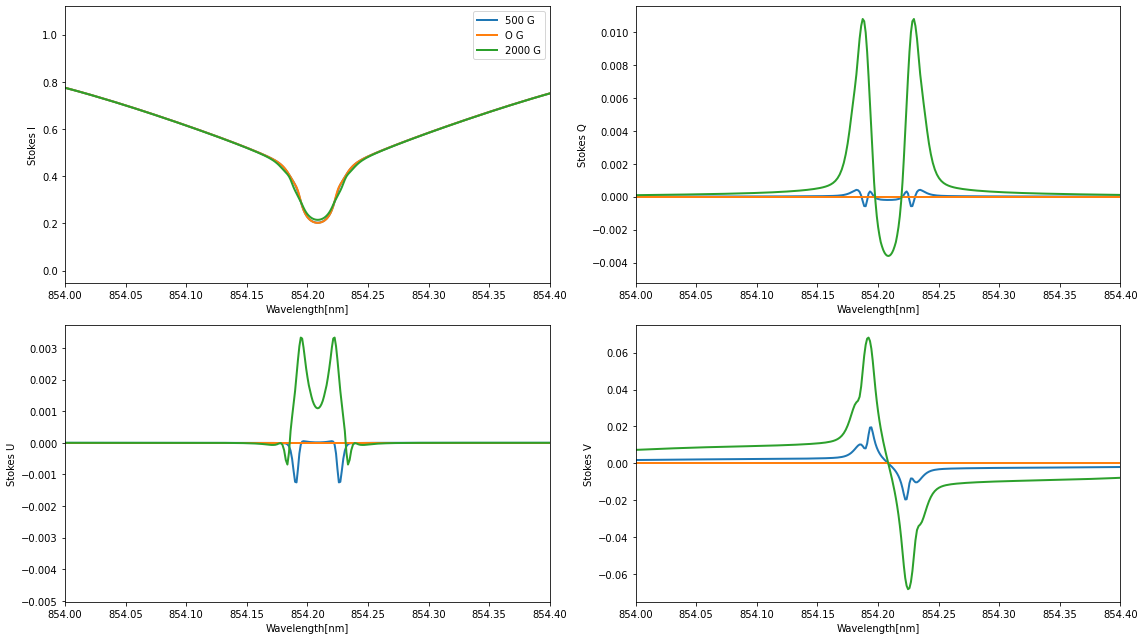

In [39]:
norm = 4E-8
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves0,I0/norm,linewidth=2.0,label='500 G')
plt.plot(waves1,I1/norm,linewidth=2.0,label='O G')
plt.plot(waves2,I2/norm,linewidth=2.0,label='2000 G')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.legend()
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves0,Q0/norm,linewidth=2.0,label='500 G')
plt.plot(waves1,Q1/norm,linewidth=2.0,label='O G')
plt.plot(waves2,Q2/norm,linewidth=2.0,label='2000 G')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves0,U0/norm,linewidth=2.0)
plt.plot(waves1,U1/norm,linewidth=2.0)
plt.plot(waves2,U2/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves0,V0/norm,linewidth=2.0)
plt.plot(waves1,V1/norm,linewidth=2.0)
plt.plot(waves2,V2/norm,linewidth=2.0)
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])

plt.tight_layout()

### Spend some time discussing this. What influences the shapes / magnitudes of the Stokes profiles? 
.

.

.

.

.

#### As a sanity check, let's change the azimuth in the last case and see what happens?

In [40]:
# And once again, now for 2000 Gauss:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')
a.B[:] = 0.2 # Remember Tesla! 
a.chi[:] = np.pi/4.0
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess

# Don't forget to run! 

In [41]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves3=falc.spectrum.waves
I3=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q3=np.copy(falc.rays[0].Q) 
U3=np.copy(falc.rays[0].U) 
V3=np.copy(falc.rays[0].V) 

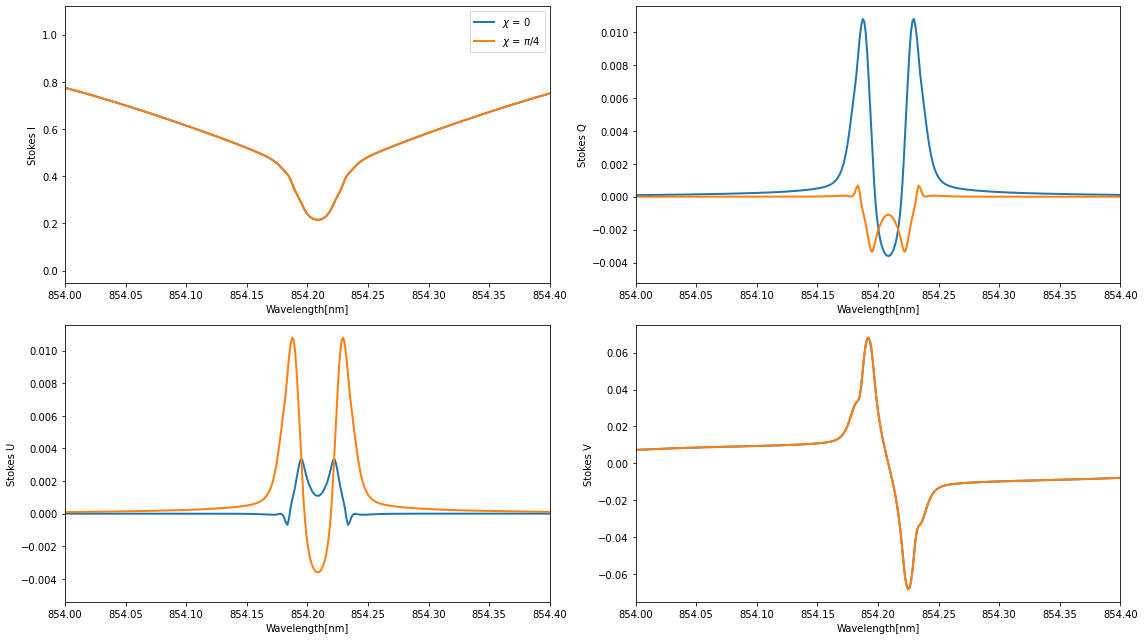

In [42]:
norm = 4E-8
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves2,I2/norm,linewidth=2.0,label='$\chi$ = 0')
plt.plot(waves3,I3/norm,linewidth=2.0,label='$\chi$ = $\pi/4$')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.legend()
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves2,Q2/norm,linewidth=2.0,label='$\chi$ = 0')
plt.plot(waves3,Q3/norm,linewidth=2.0,label='$\chi$ = $\pi/4$')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves2,U2/norm,linewidth=2.0,label='$\chi$ = 0')
plt.plot(waves3,U3/norm,linewidth=2.0,label='$\chi$ = $\pi/4$')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves2,V2/norm,linewidth=2.0,label='$\chi$ = 0')
plt.plot(waves3,V3/norm,linewidth=2.0,label='$\chi$ = $\pi/4$')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])

plt.tight_layout()

#### What happened here? Does this make sense? 

## Now, something a bit more complicated, a gradient in the magnetic field, from 500 at the top, to 2500 at the bottom! 

In [49]:
# And once again, now for 2000 Gauss:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')
a.B[:] = 0.05 + 0.20*np.linspace(0,81,82)/81.0
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess

# Don't forget to run! 



In [50]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves4=falc.spectrum.waves
I4=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q4=np.copy(falc.rays[0].Q) 
U4=np.copy(falc.rays[0].U) 
V4=np.copy(falc.rays[0].V) 

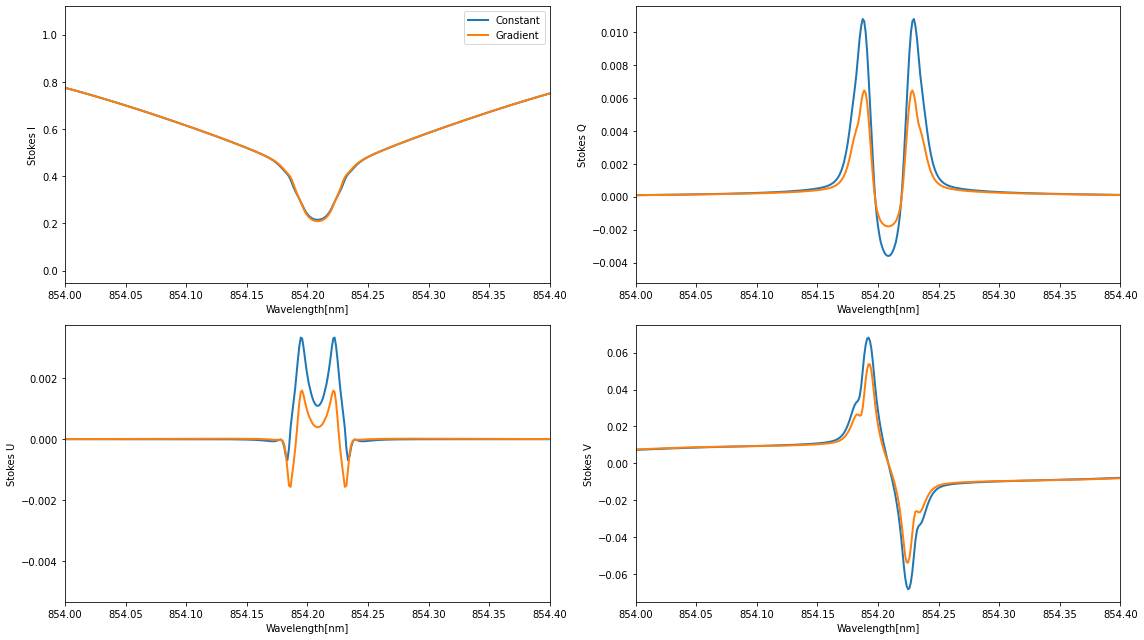

In [51]:
norm = 4E-8
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves2,I2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,I4/norm,linewidth=2.0,label='Gradient')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.legend()
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves2,Q2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,Q4/norm,linewidth=2.0,label='Gradient')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves2,U2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,U4/norm,linewidth=2.0,label='Gradient')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves2,V2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,V4/norm,linewidth=2.0,label='Gradient')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.tight_layout()

### What can you conclude here?

Change the values of the gradient and discuss. 

.

.

.

.

.

.

.


### For the end, a gradient in both the velocity AND magnetic field.

In [52]:
# And once again, now for 2000 Gauss:
a = input_atmos("ONE_D_PLANE", '/home/milic/codes/RH/Atmos/FALC_82.atmos',\
                Bfile='/home/milic/codes/RH/rhf1d/run/FALC_82_500G_45.B')
a.B[:] = 0.00 + 0.30*np.linspace(0,81,82)/81.0
a.v[:] = 25.00 - 25.0*np.linspace(0,81,82)/81.0
a.write('/home/milic/codes/RH/Atmos/FALC_82_temp.atmos',\
       Bfile='/home/milic/codes/RH/rhf1d/run/mag_field_temp.B')
del(a) # we don't want this object hanging around and making a mess

# Don't forget to run! 

In [48]:
del(falc)
falc = rhanalyze.rhout(rhoutput) 
waves5=falc.spectrum.waves
I5=np.copy(falc.rays[0].I) # Copying our spectrum for later use
Q5=np.copy(falc.rays[0].Q) 
U5=np.copy(falc.rays[0].U) 
V5=np.copy(falc.rays[0].V) 

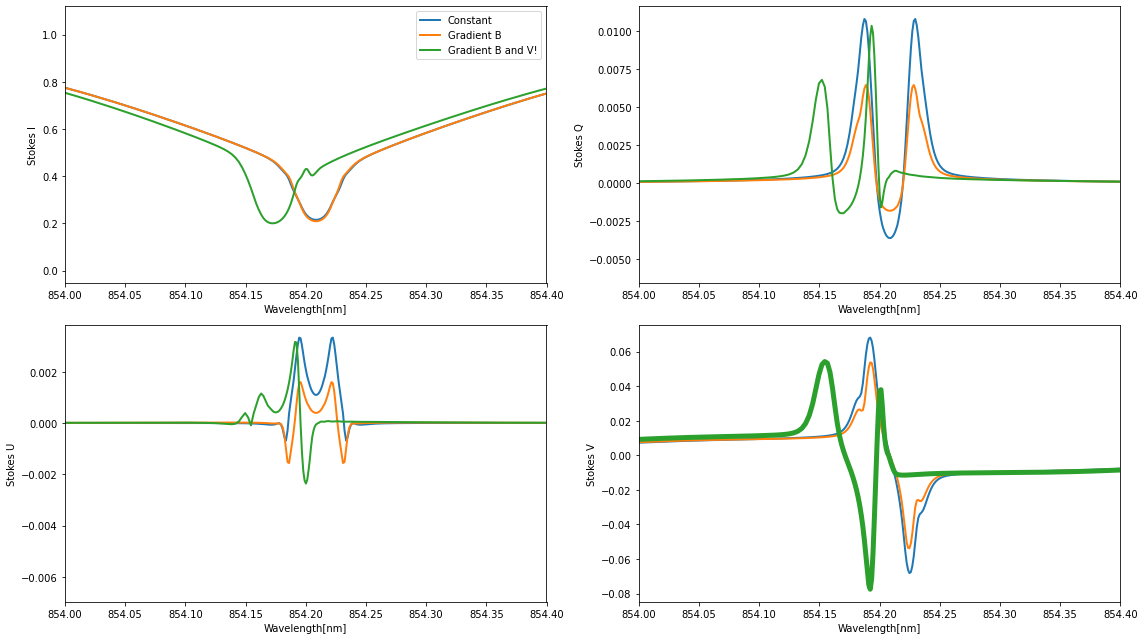

In [54]:
norm = 4E-8
# Now we are going to need a 2x2 spectrum
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.plot(waves2,I2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,I4/norm,linewidth=2.0,label='Gradient B')
plt.plot(waves5,I5/norm,linewidth=2.0,label='Gradient B and V!')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes I')
plt.legend()
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(222)
plt.plot(waves2,Q2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,Q4/norm,linewidth=2.0,label='Gradient B')
plt.plot(waves5,Q5/norm,linewidth=2.0,label='Gradient B and V!')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes Q')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(223)
plt.plot(waves2,U2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,U4/norm,linewidth=2.0,label='Gradient B')
plt.plot(waves5,U5/norm,linewidth=2.0,label='Gradient B and V!')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes U')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.subplot(224)
plt.plot(waves2,V2/norm,linewidth=2.0,label='Constant')
plt.plot(waves4,V4/norm,linewidth=2.0,label='Gradient B')
plt.plot(waves5,V5/norm,linewidth=5.0,label='Gradient B and V!')
plt.xlabel("Wavelength[nm]")
plt.ylabel('Stokes V')
plt.xlim([854.0,854.4])
#plt.xlim([655.9,656.7])
plt.tight_layout()

### Wild! 3 peaks in Stokes V !!!!

Why do you think this happens? 